Alviatul Nazila

#Import Library

In [ ]:
import pandas as pd
import numpy as np
! pip install kaggle
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
import seaborn as sns
from scipy.spatial.distance import cdist

<ipython-input-305-23e874c1ec35>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

In [ ]:
url = '/content/drive/MyDrive/songs_normalize.csv'
df = pd.read_csv(url)
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
attribute_min_max = df.describe().loc[['min', 'max']]
attribute_min_max

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
min,113000.0,1998.0,0.0,0.129,0.0549,0.0,-20.514,0.0,0.0232,0.000019,0.000,0.0215,0.0381,60.019
max,484146.0,2020.0,89.0,0.975,0.9990,11.0,-0.276,1.0,0.5760,0.976000,0.985,0.8530,0.9730,210.851


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [ ]:
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [ ]:
df.duplicated().sum()

59

In [ ]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


# Data Cleaning

## Penghapusan data duplikat

In [ ]:
duplicated_songs = df[df.duplicated(subset=['song'], keep=False)]
result = df.loc[df['song'].isin(duplicated_songs['song'])].sort_values(by='song')
result

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1625,Jon Bellion,All Time Low,217603,True,2016,70,0.617,0.567,0,-4.188,1,0.0828,0.0584,0.000000,0.0933,0.505,90.246,"hip hop, pop"
1078,The Wanted,All Time Low,205200,False,2010,18,0.689,0.615,8,-5.022,0,0.0563,0.3520,0.000000,0.0789,0.783,134.036,"pop, Dance/Electronic"
258,Ashanti,Baby,265706,True,2002,55,0.567,0.580,4,-5.757,0,0.2230,0.0084,0.000005,0.0342,0.460,157.596,"hip hop, pop, R&B"
1054,Justin Bieber,Baby,214240,False,2010,81,0.728,0.859,5,-5.237,0,0.1370,0.0401,0.000000,0.1110,0.535,65.043,pop
1518,Taylor Swift,Bad Blood,200106,False,2015,70,0.654,0.655,11,-7.388,0,0.1060,0.0294,0.000000,0.1390,0.221,170.160,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,SAYGRACE,You Don't Own Me (feat. G-Eazy),201493,False,2016,69,0.332,0.635,7,-5.653,1,0.0898,0.1590,0.000003,0.0599,0.261,186.249,"pop, R&B"
1515,DJ Snake,You Know You Like It,247266,False,2014,69,0.407,0.725,5,-5.346,0,0.1880,0.0141,0.000002,0.3060,0.247,196.093,"hip hop, pop, Dance/Electronic"
1415,DJ Snake,You Know You Like It,247266,False,2014,69,0.407,0.725,5,-5.346,0,0.1880,0.0141,0.000002,0.3060,0.247,196.093,"hip hop, pop, Dance/Electronic"
1929,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.9340,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"


In [ ]:
df = df.drop_duplicates()
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


## Mengatasi data yang hilang

In [ ]:
column_with_set_genre = df[df['genre'].str.contains('set()')]
column_with_set_genre

<ipython-input-315-3ff53c786f8f>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  column_with_set_genre = df[df['genre'].str.contains('set()')]


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
95,Wheatus,Teenage Dirtbag,241666,True,1999,71,0.625,0.850,4,-3.904,1,0.0495,0.346000,0.000233,0.1740,0.633,94.661,set()
216,Las Ketchup,The Ketchup Song (Aserejé) - Spanglish Version,213973,False,2002,66,0.607,0.923,1,-6.777,1,0.0948,0.019300,0.000001,0.0924,0.868,184.819,set()
291,Blazin' Squad,Crossroads - Radio Edit,188693,False,2012,40,0.661,0.746,4,-5.153,1,0.0420,0.109000,0.000000,0.3250,0.502,144.188,set()
428,George Michael,Amazing,265826,False,2004,57,0.805,0.754,10,-6.825,0,0.0394,0.088400,0.000002,0.1170,0.880,128.429,set()
455,DJ Casper,Cha Cha Slide - Hardino Mix,222146,False,2004,51,0.853,0.911,11,-6.722,0,0.1250,0.043600,0.005710,0.2870,0.802,131.012,set()
481,Eamon,Fuck It (I Don't Want You Back),225106,True,2004,64,0.828,0.653,0,-6.245,0,0.0653,0.214000,0.000003,0.0404,0.575,68.507,set()
545,Brian McFadden,Almost Here,229826,False,2004,42,0.561,0.452,9,-7.324,0,0.0336,0.409000,0.000000,0.1060,0.316,77.984,set()
645,Meck,Thunder in My Heart Again (Radio Edit),189800,False,2005,46,0.679,0.922,2,-4.670,0,0.0294,0.000241,0.690000,0.0697,0.806,129.016,set()
710,Ida Corr,Let Me Think About It,151973,False,2012,43,0.762,0.754,0,-3.425,0,0.0460,0.000220,0.066500,0.1460,0.715,129.026,set()
729,Camille Jones,The Creeps - Fedde Le Grand Radio Mix,152333,False,2006,17,0.847,0.861,6,-6.632,1,0.0603,0.278000,0.029000,0.0626,0.724,127.894,set()


In [ ]:
# Mencari jumlah data dengan nilai 'set()' pada kolom 'genre'
count_set_genre = len(df[df['genre'].str.contains('set()')])
count_set_genre

<ipython-input-316-8e4e68ac1df7>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count_set_genre = len(df[df['genre'].str.contains('set()')])


22

In [ ]:
df = df[df['genre'] != 'set()']
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [ ]:
# Filter nilai popularity antara 1 sampai 10
popularity_1_to_10 = df.query('popularity >= 1 and popularity <= 10')

# Tampilkan hasil
popularity_1_to_10

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
10,Gigi D'Agostino,L'Amour Toujours,238759,False,2011,1,0.617,0.728,7,-7.932,1,0.0292,0.032800,0.048200,0.3600,0.808,139.066,pop
105,Nelly Furtado,I'm Like A Bird,243160,False,2000,1,0.622,0.608,10,-5.085,1,0.0360,0.138000,0.000005,0.2730,0.607,89.661,"hip hop, pop, latin"
162,Nelly Furtado,Turn Off The Light,276106,False,2000,1,0.587,0.679,2,-6.260,1,0.0927,0.083900,0.000316,0.4130,0.650,180.184,"hip hop, pop, latin"
246,LL Cool J,Luv U Better,287000,False,2002,2,0.668,0.806,6,-3.900,1,0.2390,0.232000,0.000000,0.1800,0.721,95.022,"hip hop, pop, R&B"
330,The White Stripes,Seven Nation Army,231920,False,2003,3,0.741,0.469,4,-7.627,0,0.0805,0.006010,0.447000,0.3060,0.313,123.904,"rock, blues"
525,Baby Bash,"Baby, I'm Back",219920,True,2005,4,0.899,0.365,9,-5.461,0,0.1050,0.050800,0.000000,0.0970,0.749,100.010,"hip hop, pop, R&B, latin"
573,Westlife,You Raise Me Up,241066,False,2005,1,0.129,0.358,10,-6.596,1,0.0314,0.631000,0.000000,0.0886,0.172,75.048,pop
577,Shayne Ward,That's My Goal,219600,False,2006,1,0.286,0.508,2,-5.966,1,0.0336,0.372000,0.000000,0.2700,0.140,68.637,pop
631,Shayne Ward,No Promises,223066,False,2006,1,0.500,0.498,4,-6.087,1,0.0260,0.527000,0.000000,0.1230,0.182,79.798,pop
687,Natasha Bedingfield,Unwritten,259333,False,2004,2,0.706,0.800,5,-6.333,1,0.0399,0.005840,0.000000,0.0822,0.629,100.011,pop


## Seleksi atribut

                  duration_ms      year  popularity  danceability    energy  \
duration_ms          1.000000 -0.319004    0.044512     -0.058133 -0.079727   
year                -0.319004  1.000000   -0.008775      0.033870 -0.109470   
popularity           0.044512 -0.008775    1.000000      0.000867 -0.012911   
danceability        -0.058133  0.033870    0.000867      1.000000 -0.102425   
energy              -0.079727 -0.109470   -0.012911     -0.102425  1.000000   
key                 -0.006455  0.009309    0.014053      0.037215 -0.000729   
loudness            -0.084822  0.017638    0.030560     -0.032444  0.653256   
mode                -0.004058 -0.009029   -0.019890     -0.070916 -0.043319   
speechiness          0.064292  0.001801    0.021691      0.143658 -0.060615   
acousticness         0.008331  0.040299    0.022864     -0.068554 -0.445897   
instrumentalness    -0.002110 -0.049512   -0.045916      0.022254  0.036084   
liveness             0.023200 -0.027833   -0.010644 

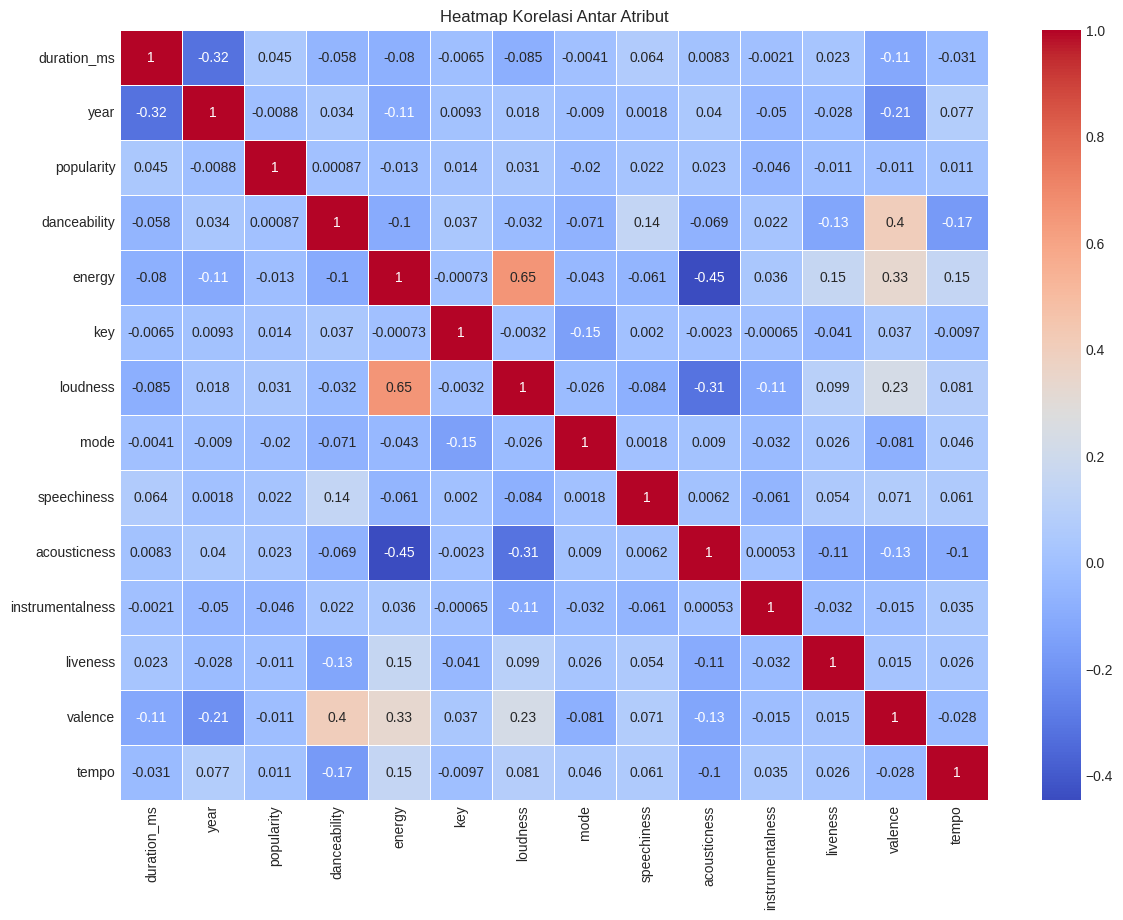

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

# Menghitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Menampilkan matriks korelasi
print(correlation_matrix)

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Atribut')
plt.show()


In [ ]:
df = df.drop(['artist', 'song', 'duration_ms', 'explicit', 'year', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo'], axis=1)
df

,popularity,danceability,energy,loudness,valence,genre
0,77,0.751,0.834,-5.444,0.894,pop
1,79,0.434,0.897,-4.918,0.684,"rock, pop"
2,66,0.529,0.496,-9.007,0.278,"pop, country"
3,78,0.551,0.913,-4.063,0.544,"rock, metal"
4,65,0.614,0.928,-4.806,0.879,pop
...,...,...,...,...,...,...
1995,79,0.842,0.734,-5.065,0.952,pop
1996,78,0.552,0.702,-5.707,0.564,pop
1997,69,0.847,0.678,-8.635,0.811,"hip hop, country"
1998,75,0.741,0.520,-7.513,0.347,pop


In [ ]:
attribute_min_max = df.describe().loc[['min', 'max']]
attribute_min_max

,popularity,danceability,energy,loudness,valence
min,0.0,0.129,0.0549,-20.514,0.0381
max,89.0,0.975,0.9990,-0.276,0.9730


In [ ]:
df.describe()

,popularity,danceability,energy,loudness,valence
count,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000
mean,59.658155,0.666998,0.721349,-5.510079,0.551702
std,21.573138,0.140733,0.152861,1.942778,0.220776
min,0.000000,0.129000,0.054900,-20.514000,0.038100
25%,56.000000,0.581000,0.624000,-6.480000,0.388500
50%,65.000000,0.676000,0.738000,-5.283000,0.558000
75%,73.000000,0.764000,0.840000,-4.168000,0.730000
max,89.000000,0.975000,0.999000,-0.276000,0.973000


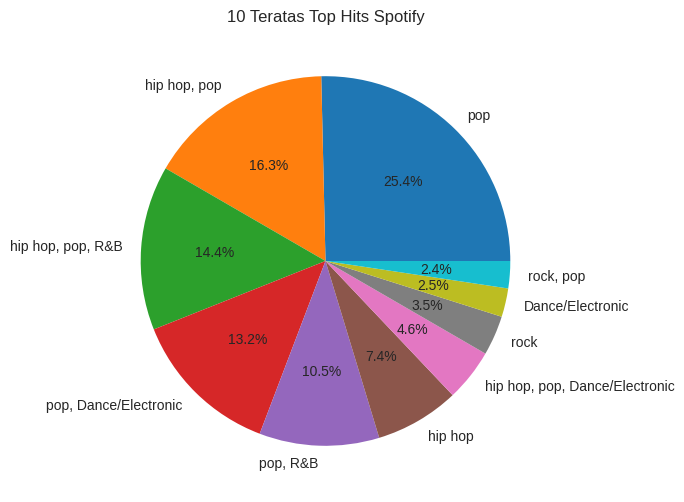

In [ ]:
# Hitung jumlah lagu per genre
genre_counts = df['genre'].value_counts()

# Ambil 10 genre teratas
top_10_genres = genre_counts.head(10)

# Plot diagram pie
plt.figure(figsize=(8, 6))
plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%')
plt.title("10 Teratas Top Hits Spotify")
plt.show()

In [ ]:
# Hitung jumlah lagu per genre
genre_counts = df['genre'].value_counts()

# Ambil 10 genre teratas
top_10_genres = genre_counts.head(10)

# Hitung persentase
percentage = (top_10_genres / top_10_genres.sum()) * 100

# Tampilkan data dan persentase
for genre, count, percent in zip(top_10_genres.index, top_10_genres, percentage):
    print(f"{genre}: {count} lagu ({percent:.1f}%)")


pop: 416 lagu (25.4%)
hip hop, pop: 267 lagu (16.3%)
hip hop, pop, R&B: 236 lagu (14.4%)
pop, Dance/Electronic: 216 lagu (13.2%)
pop, R&B: 172 lagu (10.5%)
hip hop: 121 lagu (7.4%)
hip hop, pop, Dance/Electronic: 75 lagu (4.6%)
rock: 57 lagu (3.5%)
Dance/Electronic: 41 lagu (2.5%)
rock, pop: 39 lagu (2.4%)


In [ ]:
df.head()

,popularity,danceability,energy,loudness,valence,genre
0,77,0.751,0.834,-5.444,0.894,pop
1,79,0.434,0.897,-4.918,0.684,"rock, pop"
2,66,0.529,0.496,-9.007,0.278,"pop, country"
3,78,0.551,0.913,-4.063,0.544,"rock, metal"
4,65,0.614,0.928,-4.806,0.879,pop


## Normalisasi

In [ ]:
# Normalisasi
num_cols = ['danceability', 'energy', 'loudness', 'valence']

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df

,popularity,danceability,energy,loudness,valence,genre
0,77,0.735225,0.825230,0.744639,0.915499,pop
1,79,0.360520,0.891961,0.770630,0.690876,"rock, pop"
2,66,0.472813,0.467217,0.568584,0.256605,"pop, country"
3,78,0.498818,0.908908,0.812877,0.541127,"rock, metal"
4,65,0.573286,0.924796,0.776164,0.899454,pop
...,...,...,...,...,...,...
1995,79,0.842790,0.719309,0.763366,0.977538,pop
1996,78,0.500000,0.685415,0.731643,0.562520,pop
1997,69,0.848700,0.659994,0.586965,0.826719,"hip hop, country"
1998,75,0.723404,0.492638,0.642405,0.330410,pop


In [ ]:
# Melihat nilai minimal untuk setiap atribut
min_values = df[num_cols].min()
print("Nilai Minimal untuk Setiap Atribut:")
print(min_values)
print()

# Melihat nilai maksimal untuk setiap atribut
max_values = df[num_cols].max()
print("Nilai Maksimal untuk Setiap Atribut:")
print(max_values)

Nilai Minimal untuk Setiap Atribut:
danceability    0.0
energy          0.0
loudness        0.0
valence         0.0
dtype: float64

Nilai Maksimal untuk Setiap Atribut:
danceability    1.0
energy          1.0
loudness        1.0
valence         1.0
dtype: float64


## Model k-means++

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

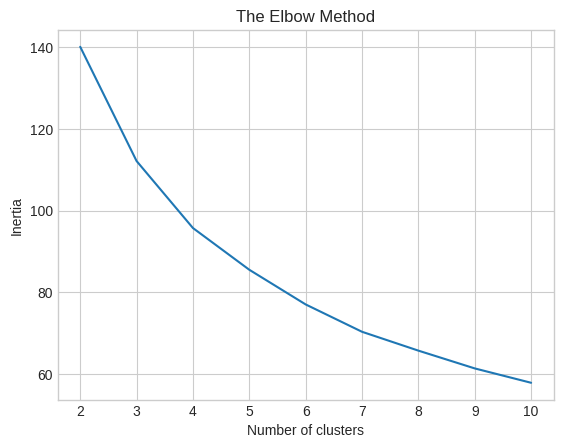

In [ ]:
elbow_cols = ['danceability', 'energy', 'loudness', 'valence']


inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df[elbow_cols])
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


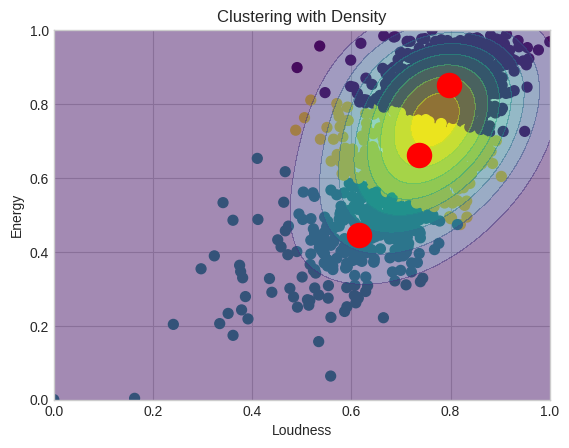

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt

# Misalkan df adalah DataFrame Anda
# df = pd.read_csv('path_to_your_data.csv')

# Memilih kolom yang diinginkan untuk clustering
selected_features = ['loudness', 'energy']
X = df[selected_features]

# Melakukan clustering dengan KMeans
kmeans = KMeans(n_clusters=3)  # Ganti jumlah klaster sesuai kebutuhan
df['cluster'] = kmeans.fit_predict(X)

# Menghitung density
kde = KernelDensity(bandwidth=0.1)
kde.fit(X)

# Membuat meshgrid untuk plot
x, y = np.meshgrid(np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100),
                   np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100))
xy = np.vstack([x.ravel(), y.ravel()]).T
z = np.exp(kde.score_samples(xy)).reshape(x.shape)

# Plot data points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=50, c=df['cluster'], cmap='viridis')
# Plot density
plt.contourf(x, y, z, levels=10, cmap='viridis', alpha=0.5)
# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Clustering with Density')
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
import numpy as np

# Misalkan df adalah DataFrame Anda
# df = pd.read_csv('path_to_your_data.csv')

# Memilih kolom yang diinginkan untuk clustering
selected_features = ['loudness', 'energy']
X = df[selected_features]

# Melakukan clustering dengan KMeans
kmeans = KMeans(n_clusters=3)  # Ganti jumlah klaster sesuai kebutuhan
df['cluster'] = kmeans.fit_predict(X)

# Menghitung density
kde = KernelDensity(bandwidth=0.1)
kde.fit(X)

# Membuat meshgrid untuk menghitung nilai density
x, y = np.meshgrid(np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100),
                   np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100))
xy = np.vstack([x.ravel(), y.ravel()]).T
z = np.exp(kde.score_samples(xy)).reshape(x.shape)

# Menampilkan jumlah lagu di setiap klaster
cluster_counts = df['cluster'].value_counts().sort_index()
print("Jumlah lagu di setiap klaster:")
print(cluster_counts)

# Menampilkan pusat klaster
print("\nPusat klaster:")
print(kmeans.cluster_centers_)

# Menampilkan nilai density untuk beberapa titik data
print("\nNilai density untuk beberapa titik data:")
sample_indices = np.random.choice(len(X), size=10, replace=False)
sample_data = X.iloc[sample_indices]
sample_density = np.exp(kde.score_samples(sample_data))

for i, (index, row) in enumerate(sample_data.iterrows()):
    print(f"Data point {i+1} - Loudness: {row['loudness']}, Energy: {row['energy']}, Density: {sample_density[i]}")

# Jika Anda ingin menampilkan density dari meshgrid
print("\nContoh nilai density dari meshgrid:")
meshgrid_density = z.flatten()
print(meshgrid_density[:10])  # Menampilkan 10 nilai pertama dari density meshgrid


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


Jumlah lagu di setiap klaster:
cluster
0    829
1    765
2    325
Name: count, dtype: int64

Pusat klaster:
[[0.79639063 0.85079888]
 [0.73580029 0.66086942]
 [0.61471641 0.44410061]]

Nilai density untuk beberapa titik data:
Data point 1 - Loudness: 0.8655993675264355, Energy: 0.8654803516576633, Density: 4.680699934325575
Data point 2 - Loudness: 0.704269196560925, Energy: 0.8940790170532782, Density: 3.8732628506750078
Data point 3 - Loudness: 0.8431169087854531, Energy: 0.9152632136426226, Density: 4.212660136896492
Data point 4 - Loudness: 0.6861844055736733, Energy: 0.6059739434381951, Density: 4.871202909785252
Data point 5 - Loudness: 0.8084296867279376, Energy: 0.8559474631924584, Density: 5.864643877066126
Data point 6 - Loudness: 0.4833481569325033, Energy: 0.2776188963033577, Density: 0.3964621342572737
Data point 7 - Loudness: 0.7229469315149719, Energy: 0.7235462345090562, Density: 6.451423282894422
Data point 8 - Loudness: 0.7026386006522385, Energy: 0.8008685520601632, 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


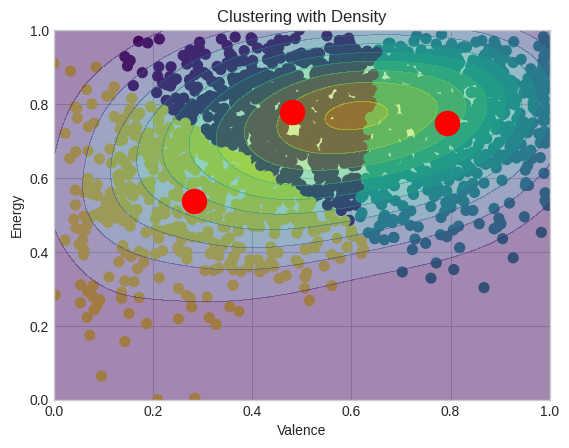

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt

# Misalkan df adalah DataFrame Anda
# df = pd.read_csv('path_to_your_data.csv')

# Memilih kolom yang diinginkan untuk clustering
selected_features = ['valence', 'energy']
X = df[selected_features]

# Melakukan clustering dengan KMeans
kmeans = KMeans(n_clusters=3)  # Ganti jumlah klaster sesuai kebutuhan
df['cluster'] = kmeans.fit_predict(X)

# Menghitung density
kde = KernelDensity(bandwidth=0.1)
kde.fit(X)

# Membuat meshgrid untuk plot
x, y = np.meshgrid(np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100),
                   np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100))
xy = np.vstack([x.ravel(), y.ravel()]).T
z = np.exp(kde.score_samples(xy)).reshape(x.shape)

# Plot data points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=50, c=df['cluster'], cmap='viridis')
# Plot density
plt.contourf(x, y, z, levels=10, cmap='viridis', alpha=0.5)
# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.title('Clustering with Density')
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
import numpy as np

# Misalkan df adalah DataFrame Anda
# df = pd.read_csv('path_to_your_data.csv')

# Memilih kolom yang diinginkan untuk clustering
selected_features = ['valence', 'energy']
X = df[selected_features]

# Melakukan clustering dengan KMeans
kmeans = KMeans(n_clusters=3)  # Ganti jumlah klaster sesuai kebutuhan
df['cluster'] = kmeans.fit_predict(X)

# Menghitung density
kde = KernelDensity(bandwidth=0.1)
kde.fit(X)

# Membuat meshgrid untuk menghitung nilai density
x, y = np.meshgrid(np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100),
                   np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100))
xy = np.vstack([x.ravel(), y.ravel()]).T
z = np.exp(kde.score_samples(xy)).reshape(x.shape)

# Menampilkan jumlah lagu di setiap klaster
cluster_counts = df['cluster'].value_counts().sort_index()
print("Jumlah lagu di setiap klaster:")
print(cluster_counts)

# Menampilkan pusat klaster
print("\nPusat klaster:")
print(kmeans.cluster_centers_)

# Menampilkan nilai density untuk beberapa titik data
print("\nNilai density untuk beberapa titik data:")
sample_indices = np.random.choice(len(X), size=10, replace=False)
sample_data = X.iloc[sample_indices]
sample_density = np.exp(kde.score_samples(sample_data))

for i, (index, row) in enumerate(sample_data.iterrows()):
    print(f"Data point {i+1} - valence: {row['valence']}, energy: {row['energy']}, Density: {sample_density[i]}")

# Jika Anda ingin menampilkan density dari meshgrid
print("\nContoh nilai density dari meshgrid:")
meshgrid_density = z.flatten()
print(meshgrid_density[:10])  # Menampilkan 10 nilai pertama dari density meshgrid


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


Jumlah lagu di setiap klaster:
cluster
0    490
1    737
2    692
Name: count, dtype: int64

Pusat klaster:
[[0.28149813 0.53735491]
 [0.79198543 0.74943211]
 [0.48080409 0.77851831]]

Nilai density untuk beberapa titik data:
Data point 1 - valence: 0.5154561985239063, energy: 0.9311513610846309, Density: 1.7141925966247835
Data point 2 - valence: 0.3774735265803829, energy: 0.853829043533524, Density: 1.853840537881552
Data point 3 - valence: 0.951866509787143, energy: 0.5869081665077851, Density: 0.6718373621103828
Data point 4 - valence: 0.8973152208792384, energy: 0.6960067789429085, Density: 1.602107755602208
Data point 5 - valence: 0.6042357471387314, energy: 0.6652896938883593, Density: 2.6744707289869125
Data point 6 - valence: 0.8267194352337149, energy: 0.9544539773329096, Density: 1.3878743405863532
Data point 7 - valence: 0.658787036046636, energy: 0.7044804575786463, Density: 2.823402961647519
Data point 8 - valence: 0.4726708738902556, energy: 0.7616777883698761, Density:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


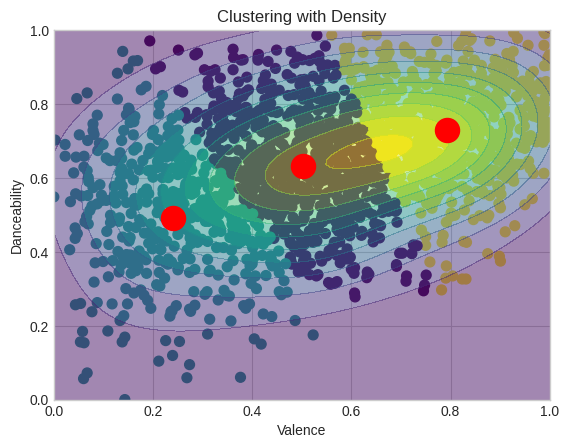

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt

# Misalkan df adalah DataFrame Anda
# df = pd.read_csv('path_to_your_data.csv')

# Memilih kolom yang diinginkan untuk clustering
selected_features = ['valence', 'danceability']
X = df[selected_features]

# Melakukan clustering dengan KMeans
kmeans = KMeans(n_clusters=3)  # Ganti jumlah klaster sesuai kebutuhan
df['cluster'] = kmeans.fit_predict(X)

# Menghitung density
kde = KernelDensity(bandwidth=0.1)
kde.fit(X)

# Membuat meshgrid untuk plot
x, y = np.meshgrid(np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100),
                   np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100))
xy = np.vstack([x.ravel(), y.ravel()]).T
z = np.exp(kde.score_samples(xy)).reshape(x.shape)

# Plot data points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=50, c=df['cluster'], cmap='viridis')
# Plot density
plt.contourf(x, y, z, levels=10, cmap='viridis', alpha=0.5)
# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('Valence')
plt.ylabel('Danceability')
plt.title('Clustering with Density')
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
import numpy as np

# Misalkan df adalah DataFrame Anda
# df = pd.read_csv('path_to_your_data.csv')

# Memilih kolom yang diinginkan untuk clustering
selected_features = ['valence', 'danceability']
X = df[selected_features]

# Melakukan clustering dengan KMeans
kmeans = KMeans(n_clusters=3)  # Ganti jumlah klaster sesuai kebutuhan
df['cluster'] = kmeans.fit_predict(X)

# Menghitung density
kde = KernelDensity(bandwidth=0.1)
kde.fit(X)

# Membuat meshgrid untuk menghitung nilai density
x, y = np.meshgrid(np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100),
                   np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100))
xy = np.vstack([x.ravel(), y.ravel()]).T
z = np.exp(kde.score_samples(xy)).reshape(x.shape)

# Menampilkan jumlah lagu di setiap klaster
cluster_counts = df['cluster'].value_counts().sort_index()
print("Jumlah lagu di setiap klaster:")
print(cluster_counts)

# Menampilkan pusat klaster
print("\nPusat klaster:")
print(kmeans.cluster_centers_)

# Menampilkan nilai density untuk beberapa titik data
print("\nNilai density untuk beberapa titik data:")
sample_indices = np.random.choice(len(X), size=10, replace=False)
sample_data = X.iloc[sample_indices]
sample_density = np.exp(kde.score_samples(sample_data))

for i, (index, row) in enumerate(sample_data.iterrows()):
    print(f"Data point {i+1} - valence: {row['valence']}, danceability: {row['danceability']}, Density: {sample_density[i]}")

# Jika Anda ingin menampilkan density dari meshgrid
print("\nContoh nilai density dari meshgrid:")
meshgrid_density = z.flatten()
print(meshgrid_density[:10])  # Menampilkan 10 nilai pertama dari density meshgrid


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


Jumlah lagu di setiap klaster:
cluster
0    713
1    449
2    757
Name: count, dtype: int64

Pusat klaster:
[[0.79335978 0.73003723]
 [0.24132183 0.49127397]
 [0.50260787 0.63328361]]

Nilai density untuk beberapa titik data:
Data point 1 - valence: 0.2598138838378436, danceability: 0.8321513002364065, Density: 0.7174799913740338
Data point 2 - valence: 0.23842122152101827, danceability: 0.6595744680851063, Density: 1.4449972221077858
Data point 3 - valence: 0.2779976468071451, danceability: 0.5555555555555556, Density: 1.8724780817161408
Data point 4 - valence: 0.8096053053802547, danceability: 0.6252955082742317, Density: 2.283485956677582
Data point 5 - valence: 0.4149106856348272, danceability: 0.5130023640661938, Density: 2.3358390811505214
Data point 6 - valence: 0.606375013370414, danceability: 0.2884160756501182, Density: 0.46203977802475177
Data point 7 - valence: 0.7817948443683816, danceability: 0.74822695035461, Density: 2.6830358400377414
Data point 8 - valence: 0.82351053

# Model

In [ ]:
model_cols = ['danceability', 'energy', 'loudness', 'valence']

inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df[model_cols])
    inertia.append(kmeans.inertia_)

for num_clusters, inertia_value in zip(range(2, 11), inertia):
    print(f"Number of clusters: {num_clusters}, Inertia: {inertia_value}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Number of clusters: 2, Inertia: 140.0291615592796
Number of clusters: 3, Inertia: 112.11940387816108
Number of clusters: 4, Inertia: 95.74875292941036
Number of clusters: 5, Inertia: 85.55184132556417
Number of clusters: 6, Inertia: 77.08024485142874
Number of clusters: 7, Inertia: 70.40008033284153
Number of clusters: 8, Inertia: 65.79389697095412
Number of clusters: 9, Inertia: 61.44932746136459
Number of clusters: 10, Inertia: 57.93966407198621


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans.fit(df[model_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
print('Cluster Centers:', kmeans.cluster_centers_)
print('Labels:', kmeans.labels_)

Cluster Centers: [[0.63666367 0.52134286 0.66316632 0.3154039 ]
 [0.72805773 0.74635208 0.76093551 0.75810028]
 [0.50021897 0.79887368 0.7772097  0.43627252]]
Labels: [1 2 0 ... 1 0 2]


In [ ]:
# Menambahkan kolom 'labels' ke dalam DataFrame
df['labels'] = kmeans.labels_
df.head()


,popularity,danceability,energy,loudness,valence,genre,cluster,labels
0,77,0.735225,0.825230,0.744639,0.915499,pop,0,1
1,79,0.360520,0.891961,0.770630,0.690876,"rock, pop",2,2
2,66,0.472813,0.467217,0.568584,0.256605,"pop, country",1,0
3,78,0.498818,0.908908,0.812877,0.541127,"rock, metal",2,2
4,65,0.573286,0.924796,0.776164,0.899454,pop,0,1


In [ ]:
Y = ['danceability', 'energy', 'loudness', 'valence']

# Menghitung jumlah lagu dalam setiap klaster
labels_counts = df['labels'].value_counts().sort_index().reset_index()
labels_counts.columns = ['labels', 'Number of Songs']

# Menghitung rata-rata dari setiap atribut dalam setiap klaster
labels_means = df.groupby('labels')[Y].mean().round(2)

# Menggabungkan informasi jumlah lagu dan rata-rata atribut dalam satu tabel
table = labels_counts.merge(labels_means, on='labels')
table.set_index('labels', inplace=True)

# Menampilkan tabel
table


,Number of Songs,danceability,energy,loudness,valence
labels,,,,,
0,481,0.64,0.52,0.66,0.32
1,856,0.73,0.75,0.76,0.76
2,582,0.50,0.80,0.78,0.44


In [ ]:
# Menghitung jumlah tiap genre dalam tiap klaster
genre_counts_per_cluster = pd.crosstab(df['genre'], df['labels'])

# Menampilkan tabel jumlah genre per klaster
genre_counts_per_cluster


labels,0,1,2
genre,,,
Dance/Electronic,10,18,13
"Folk/Acoustic, pop",0,0,2
"Folk/Acoustic, rock",0,0,1
"Folk/Acoustic, rock, pop",1,0,0
R&B,1,8,4
"World/Traditional, Folk/Acoustic",1,0,0
"World/Traditional, hip hop",0,2,0
"World/Traditional, pop",0,1,0
"World/Traditional, pop, Folk/Acoustic",0,2,0


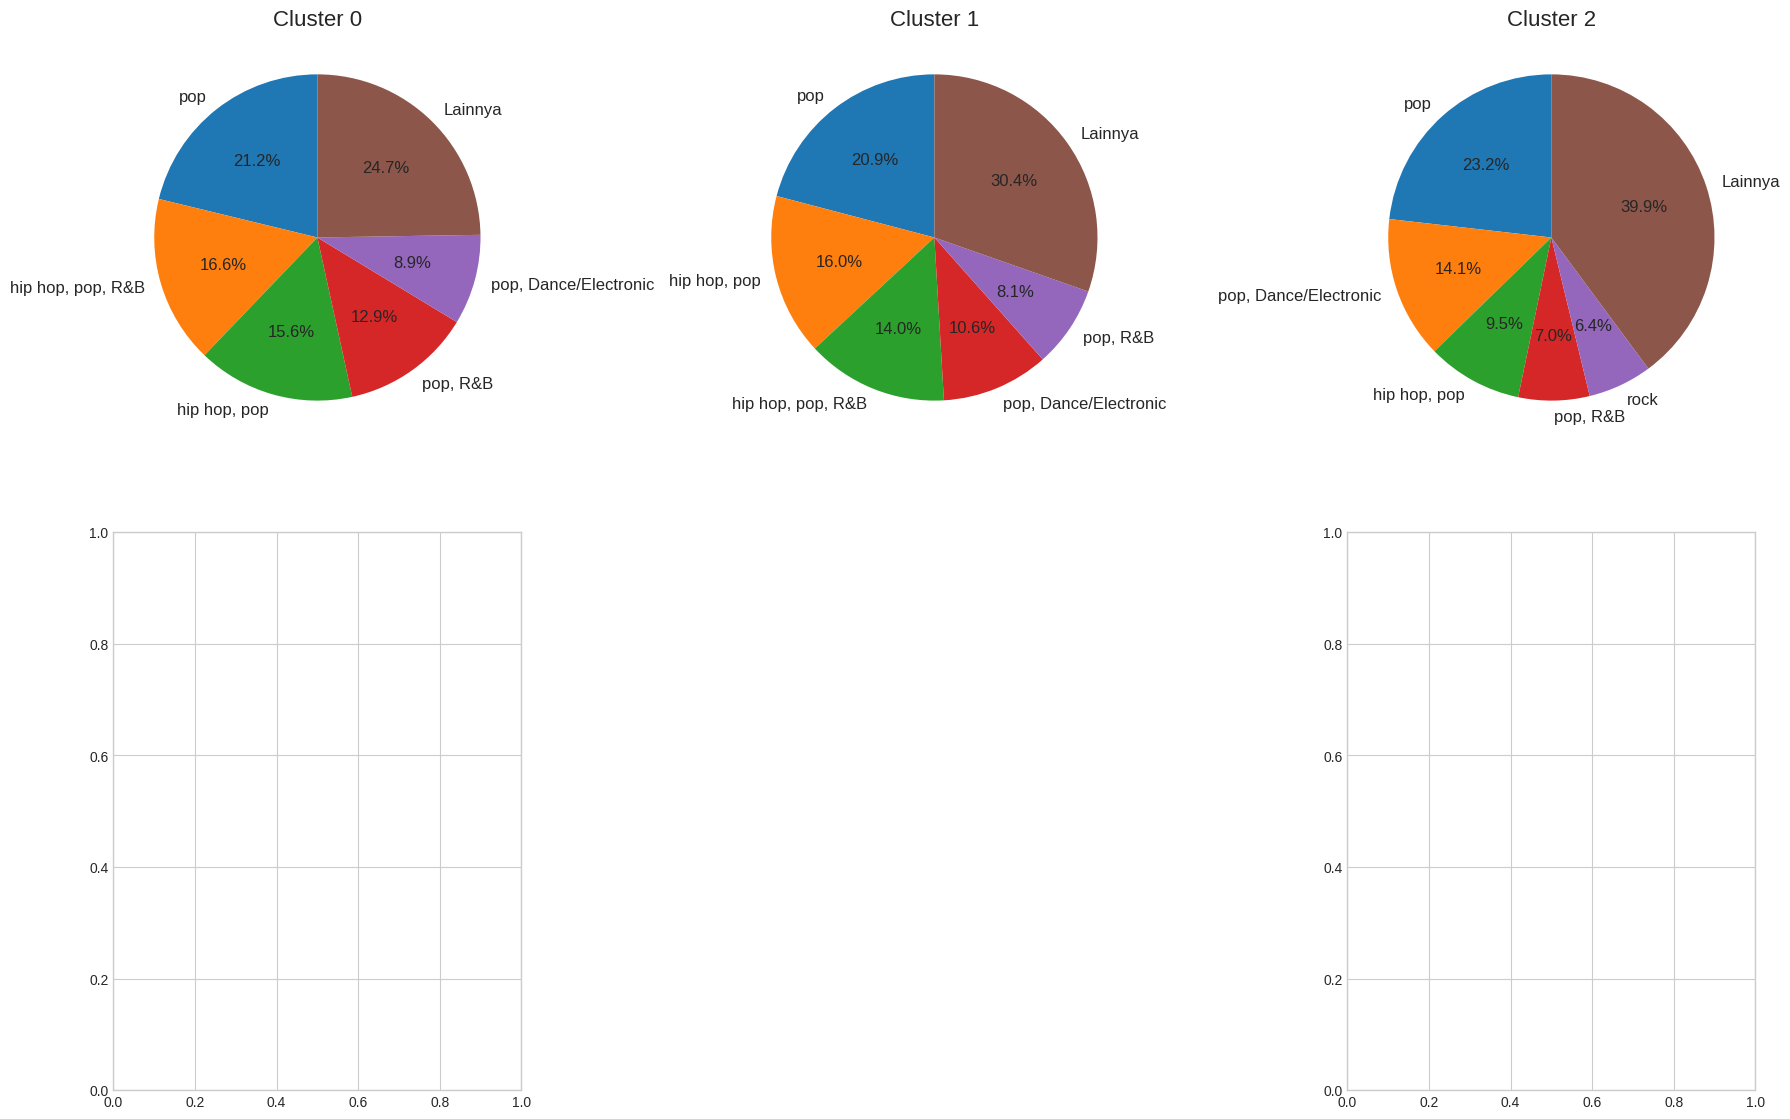

In [ ]:
import matplotlib.pyplot as plt

# Create separate DataFrames for each cluster
cluster_0 = genre_counts_per_cluster[0]
cluster_1 = genre_counts_per_cluster[1]
cluster_2 = genre_counts_per_cluster[2]

# Create subplots with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Plot pie chart for Cluster 0
cluster_0_top5 = cluster_0[cluster_0 > 0].sort_values(ascending=False)[:5]
cluster_0_Lainnya = cluster_0[~cluster_0.index.isin(cluster_0_top5.index)].sum()
labels_0 = cluster_0_top5.index.tolist() + ['Lainnya']
sizes_0 = cluster_0_top5.tolist() + [cluster_0_Lainnya]
axs[0, 0].pie(sizes_0, labels=labels_0, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
axs[0, 0].set_title('Cluster 0', fontsize=16)

# Plot pie chart for Cluster 1
cluster_1_top5 = cluster_1[cluster_1 > 0].sort_values(ascending=False)[:5]
cluster_1_Lainnya = cluster_1[~cluster_1.index.isin(cluster_1_top5.index)].sum()
labels_1 = cluster_1_top5.index.tolist() + ['Lainnya']
sizes_1 = cluster_1_top5.tolist() + [cluster_1_Lainnya]
axs[0, 1].pie(sizes_1, labels=labels_1, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
axs[0, 1].set_title('Cluster 1', fontsize=16)

# Plot pie chart for Cluster 2
cluster_2_top5 = cluster_2[cluster_2 > 0].sort_values(ascending=False)[:5]
cluster_2_Lainnya = cluster_2[~cluster_2.index.isin(cluster_2_top5.index)].sum()
labels_2 = cluster_2_top5.index.tolist() + ['Lainnya']
sizes_2 = cluster_2_top5.tolist() + [cluster_2_Lainnya]
axs[0, 2].pie(sizes_2, labels=labels_2, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
axs[0, 2].set_title('Cluster 2', fontsize=16)

# Hide the empty subplot in the second row
axs[1, 1].axis('off')

# Tweak layout
plt.tight_layout()
plt.show()


In [ ]:
# Menampilkan angka-angka dari masing-masing plot cluster diatas
print("Cluster 0:")
print(cluster_0[cluster_0 > 0].sort_values(ascending=False)[:5])

print("\nCluster 1:")
print(cluster_1[cluster_1 > 0].sort_values(ascending=False)[:5])

print("\nCluster 2:")
print(cluster_2[cluster_2 > 0].sort_values(ascending=False)[:5])


Cluster 0:
genre
pop                      102
hip hop, pop, R&B         80
hip hop, pop              75
pop, R&B                  62
pop, Dance/Electronic     43
Name: 0, dtype: int64

Cluster 1:
genre
pop                      179
hip hop, pop             137
hip hop, pop, R&B        120
pop, Dance/Electronic     91
pop, R&B                  69
Name: 1, dtype: int64

Cluster 2:
genre
pop                      135
pop, Dance/Electronic     82
hip hop, pop              55
pop, R&B                  41
rock                      37
Name: 2, dtype: int64
